<a href="https://colab.research.google.com/github/Achiever-caleb/Machine_Learning_Tutorials/blob/main/Linear_Regression_with_Fifa_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Linear Regression Overview**
Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (predictors). The goal is to find a linear equation that best describes the relationship between these variables.

For a single independent variable (simple linear regression), the model is represented as:

\[
y = b0 + b1x + e
\]

Where:
- \( y \): Dependent variable (response)
- \( x \): Independent variable (predictor)
- \( b0 \): Intercept (constant term)
- \( b1 \): Slope of the line (coefficient of \( x \))
- \( e \): Error term (difference between observed and predicted values)


### **Steps to Create a Linear Regression Model**

#### **1. Problem Definition**
Clearly define the problem, including:
- The dependent variable you want to predict.
- The independent variables (features) that might influence the dependent variable.

#### **2. Collect and Prepare Data**
- **Data Collection**: Gather relevant data from reliable sources.
- **Data Cleaning**: Handle missing values, remove duplicates, and deal with outliers.
- **Feature Engineering**: Select relevant features and create new ones if necessary.
- **Data Splitting**: Divide the dataset into training and testing subsets (commonly 80% training and 20% testing).

#### **3. Exploratory Data Analysis (EDA)**
- Visualize data distributions, relationships, and trends.
- Identify correlations between predictors and the target variable using techniques like scatter plots or a correlation matrix.
- Check for multicollinearity among predictors (e.g., using Variance Inflation Factor).

#### **4. Assumptions Check**
Linear regression relies on several assumptions:
1. **Linearity**: The relationship between predictors and the target is linear.
2. **Independence**: Observations are independent of each other.
3. **Homoscedasticity**: The residuals (errors) have constant variance.
4. **Normality of Errors**: The residuals are normally distributed.
5. **No Multicollinearity**: Predictors should not be highly correlated with each other.

#### **5. Train the Model**
- Use statistical or machine learning libraries (e.g., Python's `scikit-learn` or `statsmodels`) to fit a linear regression model.


#### **6. Evaluate the Model**
- Use the testing dataset to assess model performance.
- Common evaluation metrics:
  - **Mean Squared Error (MSE)**: Measures average squared differences between actual and predicted values.
  - **Root Mean Squared Error (RMSE)**: Square root of MSE for interpretability.
  - **R-squared (\( R^2 \))**: Explains the proportion of variance in the target variable explained by the predictors.

#### **7. Interpret the Results**
- Analyze the coefficients to understand the influence of each predictor.
- Assess statistical significance using \( p \)-values (if using `statsmodels`).

#### **8. Improve the Model**
- **Feature Selection**: Remove irrelevant or collinear features.
- **Regularization**: Apply techniques like Ridge or LASSO regression to penalize large coefficients and reduce overfitting.
- **Model Diagnostics**: Check residual plots to identify patterns that violate assumptions.

#### **9. Save and Deploy the Model**
- Save the model for future use using libraries like `pickle` or `joblib`:
- Deploy the model in a production environment to make predictions on new data.

#### **10. Monitor the Model**
- Continuously monitor the model's performance and retrain it as necessary when new data becomes available or when the underlying data distribution changes.

The Dataset we will be working with is available on Kaggle via the link below.

https://www.kaggle.com/datasets/anishasapra/fifa-players-dataset

### Problem Definition
The goal is to predict the value of a FIFA player based on their attributes, focusing on their overall potential.

- Dependent Variable (Target)
Player Value: Represents the monetary value of the player, typically influenced by their skills, performance, and potential.
- Independent Variables (Features)
Player Overall Potential: A measure of the player's future ability or growth potential.

### Data Collection and Preparation

#### General Cleaning

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df= pd.read_csv("/content/fifa_dataset.csv")

In [3]:
df.head()

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170 cm,72 kg,Argentina,FC Barcelona,94,94,95.50 M,565 K,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187 cm,83 kg,Portugal,Juventus,93,93,58.50 M,405 K,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175 cm,68 kg,Brazil,Paris Saint-Germain,92,92,105.50 M,290 K,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188 cm,87 kg,Slovenia,Atlético Madrid,91,93,77.50 M,125 K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175 cm,74 kg,Belgium,Real Madrid,91,91,90.00 M,470 K,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
df["weight_kg"] = df["weight_kg"].str.replace("kg"," ").astype(float)


In [5]:
df["height_cm"] = df["height_cm"].str.replace("cm"," ").astype(float)

In [6]:
df["value_eur"] = df["value_eur"].str.replace("M"," ").astype(float)
df["wage_eur"] = df["wage_eur"].str.replace("K"," ").astype(float)

In [7]:
df=df.rename(columns={"value_eur":"value_in_millions","wage_eur":"wage_in_thousands"})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  float64
 3   weight_kg                   18278 non-null  float64
 4   nationality                 18278 non-null  object 
 5   club                        18278 non-null  object 
 6   overall                     18278 non-null  int64  
 7   potential                   18278 non-null  int64  
 8   value_in_millions           18278 non-null  float64
 9   wage_in_thousands           18278 non-null  float64
 10  player_positions            18278 non-null  object 
 11  international_reputation    18278 non-null  int64  
 12  weak_foot                   18278 non-null  int64  
 13  skill_moves                 182

In [ ]:
np.r_[0,1,2,3,4,5,6,8,9,10]
df_new = df.iloc[:,np.r_[0,1,2,3,4,5,6,8,9,10]]

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               18278 non-null  object 
 1   age                18278 non-null  int64  
 2   height_cm          18278 non-null  float64
 3   weight_kg          18278 non-null  float64
 4   nationality        18278 non-null  object 
 5   club               18278 non-null  object 
 6   overall            18278 non-null  int64  
 7   value_in_millions  18278 non-null  float64
 8   wage_in_thousands  18278 non-null  float64
 9   player_positions   18278 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 1.4+ MB


In [ ]:
df_new.describe()


,age,height_cm,weight_kg,overall,value_in_millions,wage_in_thousands
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,181.362184,75.276343,66.244994,2.485018,9.456943
std,4.656964,6.756961,7.047744,6.949953,5.585149,21.351714
min,16.000000,156.000000,50.000000,48.000000,0.000000,0.000000
25%,22.000000,177.000000,70.000000,62.000000,0.330000,1.000000
50%,25.000000,181.000000,75.000000,66.000000,0.700000,3.000000
75%,29.000000,186.000000,80.000000,71.000000,2.100000,8.000000
max,42.000000,205.000000,110.000000,94.000000,105.500000,565.000000


## Univariate Analysis


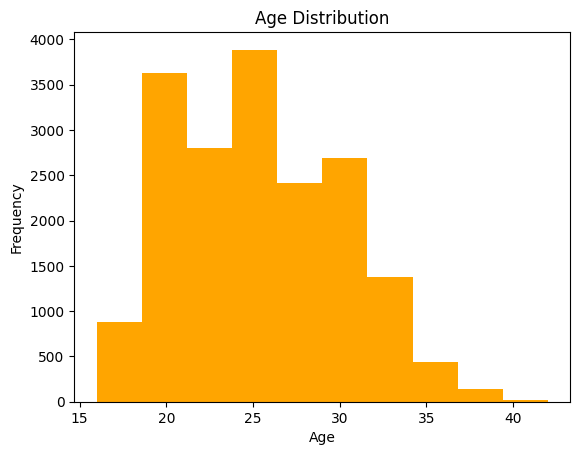

In [ ]:
plt.hist(df_new["age"], color="orange")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

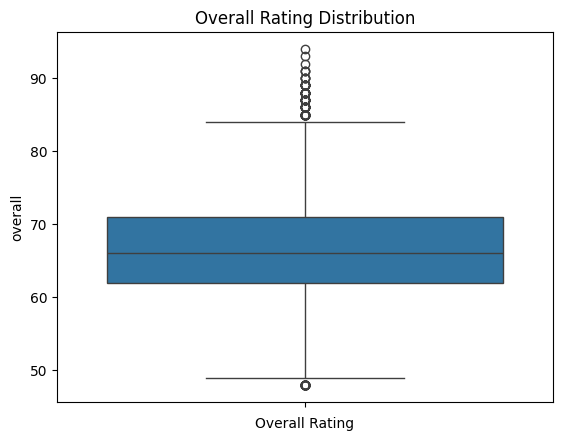

In [ ]:
sns.boxplot(df_new["overall"])
plt.title("Overall Rating Distribution")
plt.xlabel("Overall Rating")
plt.show()

In [ ]:
#Top 10 countries in the dataset

num_nat=df_new["nationality"].value_counts().head(10)
print(num_nat)

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: count, dtype: int64


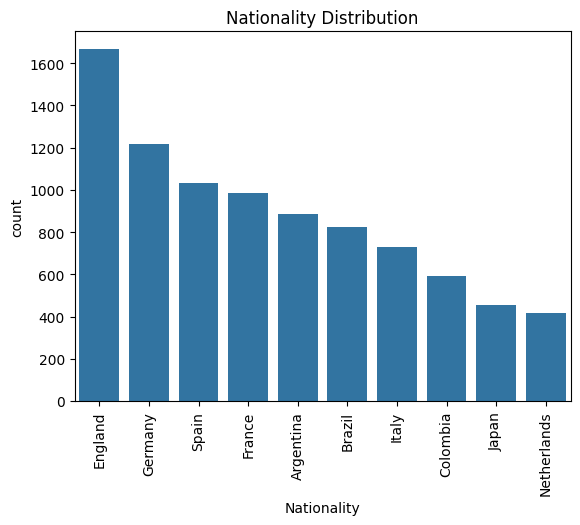

In [ ]:
sns.barplot(num_nat)
plt.title("Nationality Distribution")
plt.xlabel("Nationality")
plt.xticks(rotation=90)
plt.show()

## Multivariate

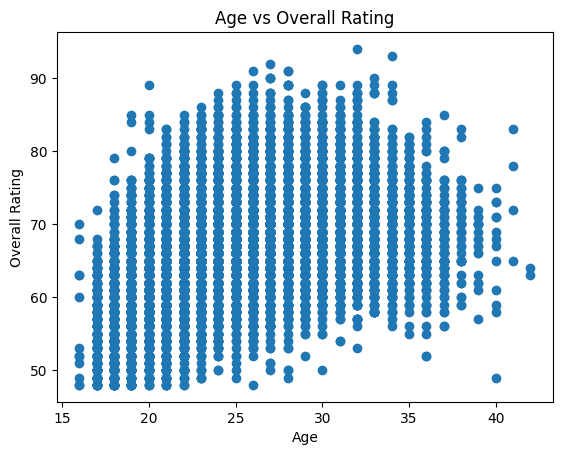

In [ ]:
plt.scatter(df_new["age"],df_new["overall"])
plt.title("Age vs Overall Rating")
plt.xlabel("Age")
plt.ylabel("Overall Rating")
plt.show()

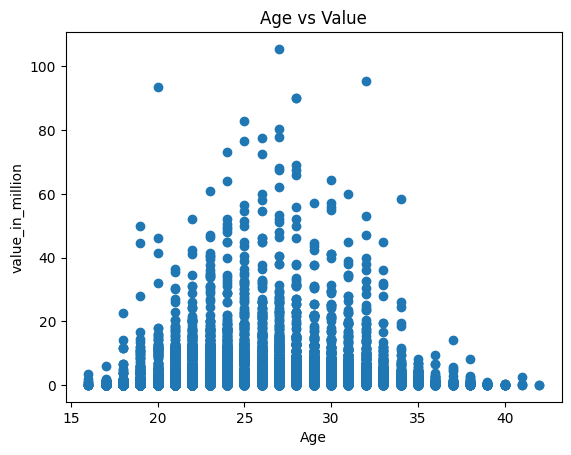

In [ ]:
plt.scatter(df_new["age"],df_new["value_in_millions"])
plt.title("Age vs Value")
plt.xlabel("Age")
plt.ylabel("value_in_million")
plt.show()

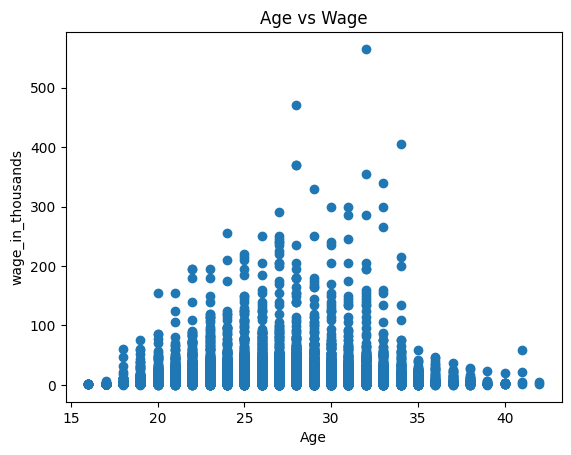

In [ ]:
plt.scatter(df_new["age"],df_new["wage_in_thousands"])
plt.title("Age vs Wage")
plt.xlabel("Age")
plt.ylabel("wage_in_thousands")
plt.show()

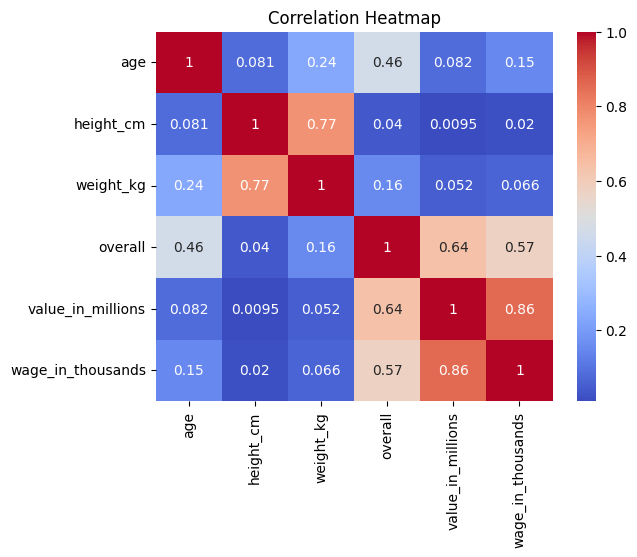

In [ ]:
numerical_cols = df_new.select_dtypes(include=["number"]).columns
sns.heatmap(df_new[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Problem Based Analysis

In [10]:
np.r_[6,8]
rating_df=df.iloc[:,np.r_[6,8]]

In [11]:
rating_df.head()

,overall,value_in_millions
0,94,95.5
1,93,58.5
2,92,105.5
3,91,77.5
4,91,90.0


In [13]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   overall            18278 non-null  int64  
 1   value_in_millions  18278 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 285.7 KB


There are no null values in the columns above, so we can proceed to check for linearity.

In [14]:
rating_df.describe()

,overall,value_in_millions
count,18278.000000,18278.000000
mean,66.244994,2.485018
std,6.949953,5.585149
min,48.000000,0.000000
25%,62.000000,0.330000
50%,66.000000,0.700000
75%,71.000000,2.100000
max,94.000000,105.500000


#### Assumption Check

- Linearity

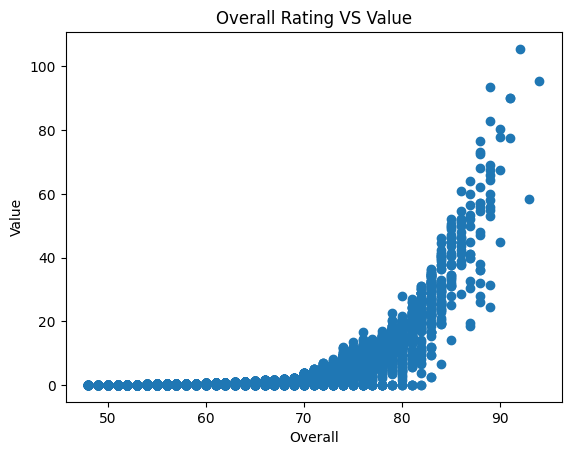

In [12]:
plt.scatter(rating_df["overall"],rating_df["value_in_millions"])
plt.title("Overall Rating VS Value")
plt.xlabel("Overall")
plt.ylabel("Value")
plt.show()

In [16]:
corr_matrix=rating_df.corr()
corr_matrix

,overall,value_in_millions
overall,1.000000,0.638226
value_in_millions,0.638226,1.000000


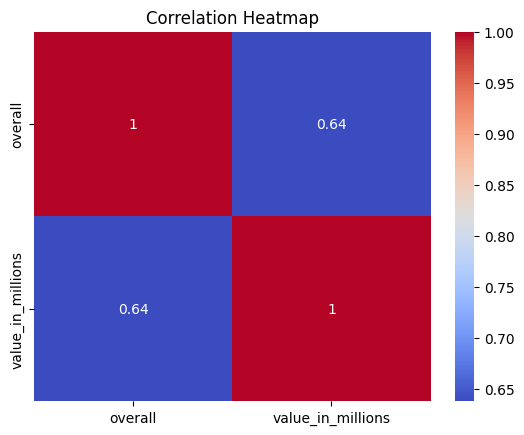

In [17]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

SInce we are creating a simple Linear Regression, we will proceed to create our linear model.

#### Train the Model

In [21]:
X = rating_df[["overall"]]
y = rating_df["value_in_millions"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [20]:
lm= LinearRegression()

In [24]:
model = lm.fit(X_train, y_train)
model

LinearRegression()

In [27]:
model.coef_[0]

0.5140730903386262

In [26]:
model.intercept_

-31.555142485406456

Interpretation

Using the given model parameters:

- **Intercept** (b_0 ) = -31.555142485406456  
- **Coefficient** (b_1) = 0.5140730903386262  

The equation of the linear regression model is:

y = b_0 + b_1x

Substituting the values:

Player Value = -31.5551 + 0.5141 x Player Overall Potential



This implies that:
- For every one-unit increase in **Player Overall Potential**, the **Player Value** increases by approximately **0.5141 units**.
- When the **Player Overall Potential** is 0 (hypothetically), the **Player Value** is approximately **-31.5551** (though this might not have practical meaning if potential cannot be 0).

### Evaluate the Model

In [31]:
predictions = model.predict(X_test)
predictions

array([ 1.3455353 ,  6.4862662 ,  3.91590075, ..., -1.22483016,
       -4.3092687 ,  3.40182766])

In [32]:
y_test

,value_in_millions
11854,0.27
2647,5.00
5945,1.00
6798,1.30
12985,0.35
...,...
13684,0.28
7453,0.78
15695,0.21
17583,0.12


In [33]:
def calculate_evaluation_metrics(predictions, y_values):

    r2 = r2_score(y_values, predictions)
    mae = mean_absolute_error(y_values, predictions)
    mse = mean_squared_error(y_values, predictions)
    rmse = np.sqrt(mse)

    return r2, mae, mse, rmse

In [35]:
evaluation_metrics = calculate_evaluation_metrics(predictions, y_test)
print(f"Evaluation Metrics:\nR-squared: {evaluation_metrics[0]}\nMAE: {evaluation_metrics[1]}\nMSE: {evaluation_metrics[2]}\nRMSE: {evaluation_metrics[3]}")

Evaluation Metrics:
R-squared: 0.41499899160689113
MAE: 2.319943417700389
MSE: 17.181454175488064
RMSE: 4.145051769940644


### Diagnosing model fit through residual analysis

In [36]:
residuals = y_test - predictions

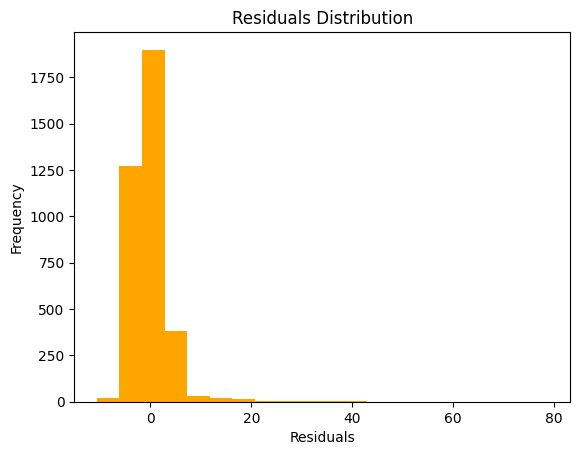

In [38]:
plt.hist(residuals, bins=20, color='orange')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

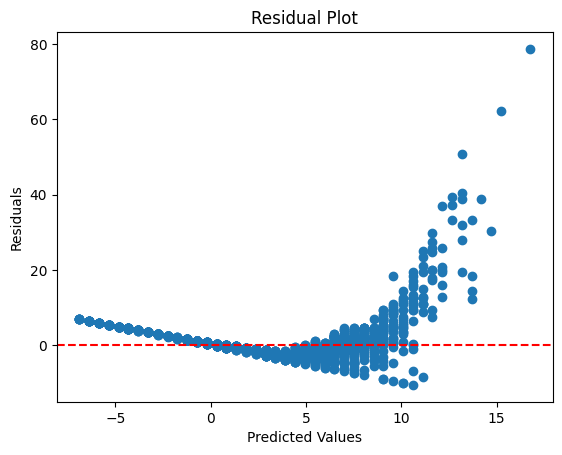

In [37]:
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [39]:
def calculate_residuals_statistics(predictions, y_test):
    residuals = y_test - predictions
    mean_residual = np.mean(residuals)
    std_residual = np.std(residuals)
    return mean_residual, std_residual

In [40]:
mean_residual, std_residual = calculate_residuals_statistics(predictions, y_test)
print(f"Mean: {mean_residual}\nStandard deviation: {std_residual}")


Mean: -0.07303318766363713
Standard deviation: 4.144408320736235


### **Conclusion**

The linear regression model for predicting FIFA player value based on overall potential has been evaluated using several metrics:

1. **R-squared (0.415)**:  
   The model explains approximately 41.5% of the variance in player value, indicating a moderate fit. While it captures some of the relationship between overall potential and player value, there is room for improvement.

2. **MAE (2.32)**:  
   On average, the model's predictions deviate from the actual player values by about 2.32 units. This indicates a relatively small error in absolute terms.

3. **MSE (17.18) and RMSE (4.15)**:  
   The Mean Squared Error and Root Mean Squared Error reflect the average squared and root-squared deviations between predicted and actual values. The RMSE is close to the standard deviation of the residuals (4.144), suggesting consistent error distribution.

4. **Residual Analysis (Mean and Standard Deviation)**:  
   - The **mean of residuals (-0.073)** is close to zero, which is ideal for a linear regression model.  
   - The **standard deviation of residuals (4.144)** aligns closely with the RMSE, indicating that the error distribution is stable.

### **Insights**:
- The model performs reasonably well but could be enhanced by including additional predictive features beyond overall potential.  
- The moderate \( R^2 \) value suggests that other factors (e.g., age, position, or specific skill ratings) might also influence player value and should be explored for inclusion in future models.

